<a href="https://colab.research.google.com/github/Imparth2803/Data-Science-Project/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile
from google.colab import drive
import os
from PIL import Image
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extracting dataset from zipfile

In [ ]:
# Define file paths
zip_path = "/content/drive/MyDrive/ISIC_2019_Training_Input.zip"
csv_path = "/content/drive/MyDrive/ISIC_2019_Training_Metadata.csv"
extract_path = "/content/ISIC_2019_Training_Input"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Dataset extracted successfully!


In [ ]:
df = pd.read_csv(csv_path)

# Display first 5 rows
print(df.head())

# Show dataset info
df.info()

print(df.isnull().sum())

          image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB
image                     0
age_approx              437
anatom_site_general    2631
lesion_i

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values
df['age_approx'] = df['age_approx'].fillna(df['age_approx'].median())

# Fill missing sex values with "unknown"
df['sex'] = df['sex'].fillna("unknown")

# Verify again
print(df.isnull().sum())

Missing Values:
 image                     0
age_approx              437
anatom_site_general    2631
lesion_id              2084
sex                     384
dtype: int64
image                     0
age_approx                0
anatom_site_general    2631
lesion_id              2084
sex                       0
dtype: int64


In [ ]:
# Drop rows with null values in the "anatom_site_general" column
df = df.dropna(subset=['anatom_site_general'])

# Verify
print(df.isnull().sum())

image                     0
age_approx                0
anatom_site_general       0
lesion_id              1327
sex                       0
dtype: int64


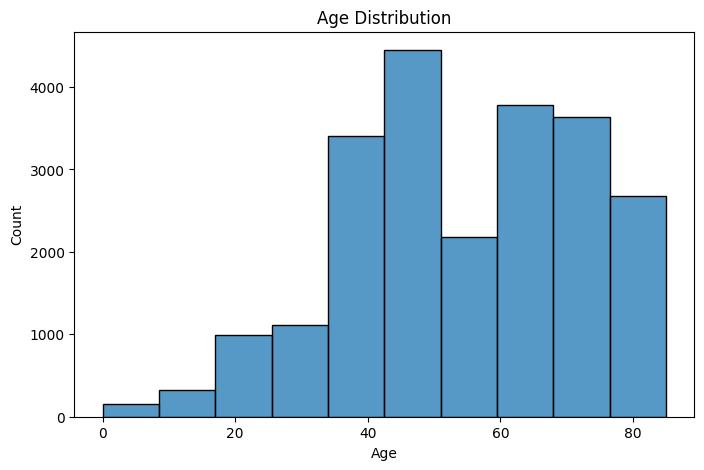

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["age_approx"], bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

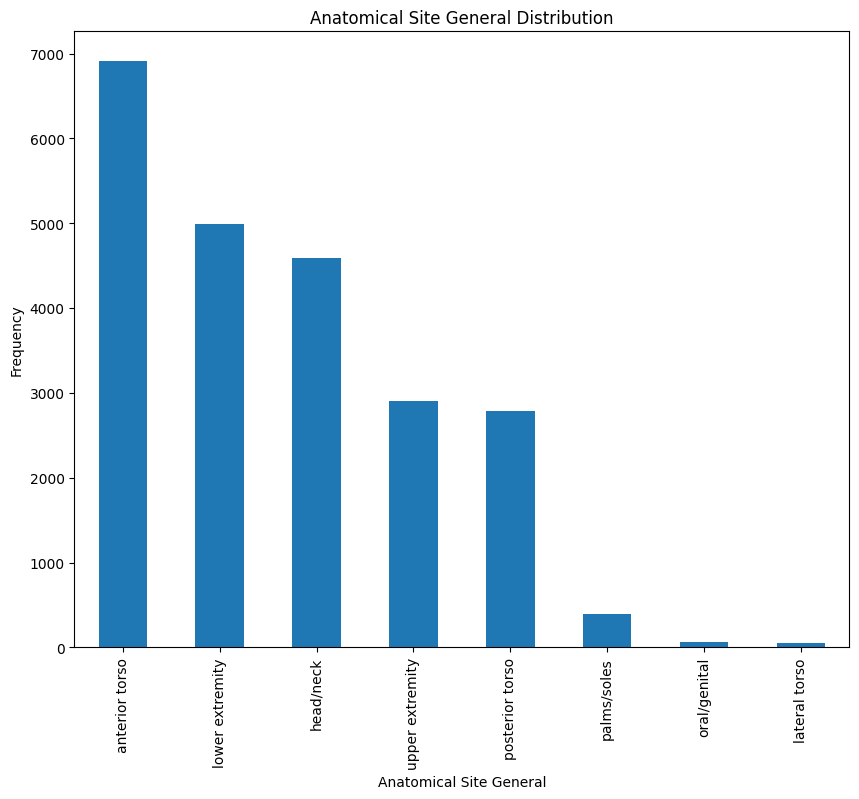

In [ ]:
plt.figure(figsize=(10, 8))
df['anatom_site_general'].value_counts().plot(kind='bar')
plt.title('Anatomical Site General Distribution')
plt.xlabel('Anatomical Site General')
plt.ylabel('Frequency')
plt.show()

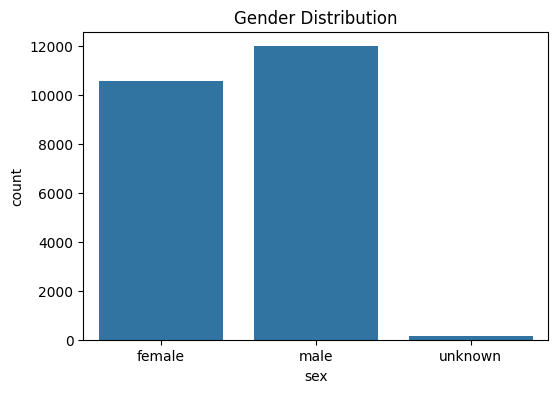

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="sex", data=df)
plt.title("Gender Distribution")
plt.show()

In [ ]:
lesion_path = "/content/drive/MyDrive/ISIC_2019_Training_GroundTruth.csv"

In [ ]:
df_lesion = pd.read_csv(lesion_path)

# Display first 5 rows
print(df_lesion.head())

# Show dataset info
df_lesion.info()

print(df_lesion.isnull().sum())

          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB
image    0
MEL      0
N

MEL      4522.0
NV      12875.0
BCC      3323.0
AK        867.0
BKL      2624.0
DF        239.0
VASC      253.0
SCC       628.0
UNK         0.0
dtype: float64


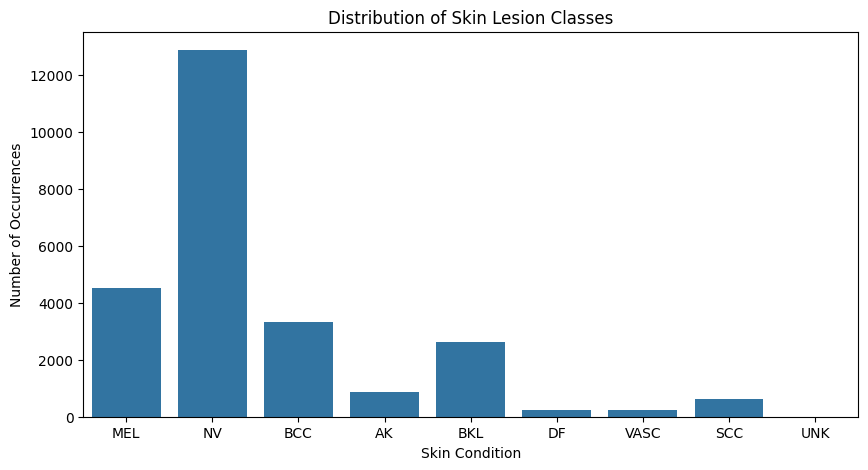

In [ ]:
positive_counts = df_lesion.iloc[:, 1:].sum()
print(positive_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=positive_counts.index, y=positive_counts.values)
plt.xlabel("Skin Condition")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Skin Lesion Classes")
plt.show()

In [ ]:
# Define Constants
IMG_SIZE = (128, 128)
DATA_DIR = "/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input"
LABELS_CSV = "/content/drive/MyDrive/ISIC_2019_Training_GroundTruth.csv"
BATCH_SIZE = 500
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator with Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load images using flow_from_dataframe
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=DATA_DIR,
    x_col='image',
    y_col=df.columns[1:],
    target_size=(128, 128),
    batch_size=32,
    class_mode='raw',
    shuffle=True
)

# Check batch shape
batch_images, batch_labels = next(train_generator)
print(f"Batch Image Shape: {batch_images.shape}, Batch Label Shape: {batch_labels.shape}")

Found 0 validated image filenames.
Batch Image Shape: (0, 128, 128, 3), Batch Label Shape: (0, 4)


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 22700 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # 8 classes
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()